<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [2]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 65.2 MB/s 
     |████████████████████████████████| 11.2 MB 54.8 MB/s 
     |████████████████████████████████| 718 kB 60.6 MB/s 
     |████████████████████████████████| 930 kB 58.1 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639035 sha256=7cd0c870c7bcfeb44072caa1f44621d307939909547bfb6b992fb68a9ec29b8b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 4.4 MB/s 
     |████████████████████████████████| 3.3 MB 53.4 

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



Я взяла популярные датасеты с сайта https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc:

ts1:U.S. nuclear capacity, daily (‘Nuclear Capacity.csv’)-дневной

ts2:Imports of all grades of crude oil from World to Total U.S. (US), Monthly (‘Imports Crude Oil.csv’)-месячный

Загрузила данные в облачное хранилище:

In [3]:
timeseries1_link='https://drive.google.com/uc?export=download&id=1xGa5PNtgJny9Yy0W7IYG5WEHR6yYRE44'
timeseries2_link='https://drive.google.com/uc?export=download&id=15xTNldOUifxx4_91Op6CKZ_U06w5FGCT'

In [4]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6222e5970708381f5ac181fc9f9c96e6e2d41e3b72814615dee11ad802ea351c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [5]:
#скачиваем файлы
import wget
wget.download(timeseries1_link)
wget.download(timeseries2_link)

'Imports Crude Oil monthly.csv'

In [6]:
# считаем файлы
ts1 = pd.read_csv('Nuclear Capacity daily.csv')
ts2 = pd.read_csv('Imports Crude Oil monthly.csv')

In [7]:
#заменим имена колонок на легко воспринимаемые
ts1.rename(columns = {'Unnamed: 0':'date','U.S. nuclear capacity, daily (Megawatts)':'U.S. nuclear capacity'}, inplace = True)
ts2.rename(columns = {'Unnamed: 0':'date','Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)':'Import'}, inplace = True)

Приведем в порядок формат даты:

In [8]:
ts1['date']=ts1['date'].astype('str') 
ts2['date']=ts2['date'].astype('str') 

In [9]:
#заменяем пробел на тире
ts1['date']=ts1['date'].str.replace(' ','-')
ts2['date']=ts2['date'].str.replace(' ','-')

In [10]:
#убираем ненужные индексы в конце даты
ts1['date']=ts1['date'].str[:-3]
ts2['date']=ts2['date'].str[:-1]

In [11]:
#вставляем тире между месяцем и днем
ts1['date']=ts1['date'].str[:7]+'-'+ts1['date'].str[7:]

Сортируем по дате значения на всякий случай и сделаем индексы как даты:

In [12]:
ts1.date = pd.DatetimeIndex(ts1.date)
ts2.date = pd.DatetimeIndex(ts2.date)
ts1.sort_values(by = "date")
ts2.sort_values(by = "date")
ts1.index = pd.PeriodIndex(ts1.date, freq='D')
ts2.index = pd.PeriodIndex(ts2.date, freq='M')

В первом ряду не получается взять 80/20 и чтобы в тестовой выборке было 2 года, поэтому возьмем 75/25.

In [13]:
# сделаем разбиение на train/test
ts1_train=ts1[:int(len(ts1)*0.75)]
ts1_test=ts1[int(len(ts1)*0.75):]

Во втором ряду все получается, берем 80/20.

In [14]:
ts2_train=ts2[:int(len(ts2)*0.8)]
ts2_test=ts2[int(len(ts2)*0.8):]

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

Отрисуем временные ряды.

In [15]:
#!pip install matplotlib==3.1.3

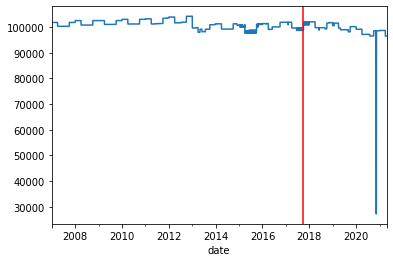

In [16]:
# первый ряд
ts1['U.S. nuclear capacity'].plot()
plt.axvline(x='2017-09-23',color='r')

Как мы видим по данному графику, есть сезонность (год), структурный сдвиг в конце 2020 года,тренд не особо прослеживается.

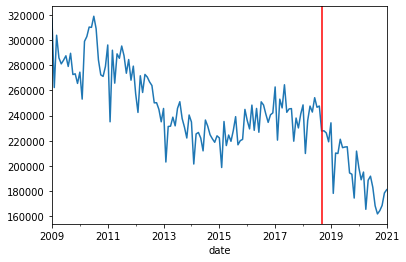

In [17]:
#второй ряд
ts2['Import'].plot()
plt.axvline(x='2018-09',color='r')

Есть нелинейный тренд, есть сезонность (примерно год).

Построим автокорреляцию для ts1:

Text(0.5, 1.0, 'ACF для ts1')

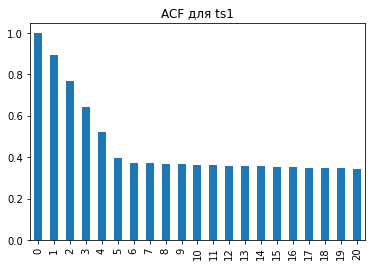

In [18]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts1['U.S. nuclear capacity'].dropna(), nlags=20)
ACF=pd.Series(lag_acf)
ACF.plot(kind = "bar")
plt.title("ACF для ts1")

Text(0.5, 1.0, 'PACF для ts1')

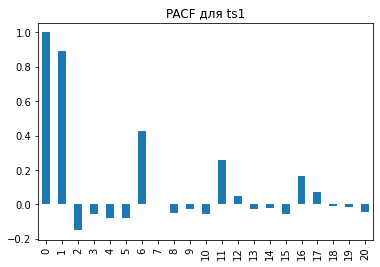

In [19]:
lag_pacf = pacf(ts1['U.S. nuclear capacity'].dropna(), nlags=20)
PACF=pd.Series(lag_pacf)
PACF.plot(kind = "bar")
plt.title('PACF для ts1')

Проверим:

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


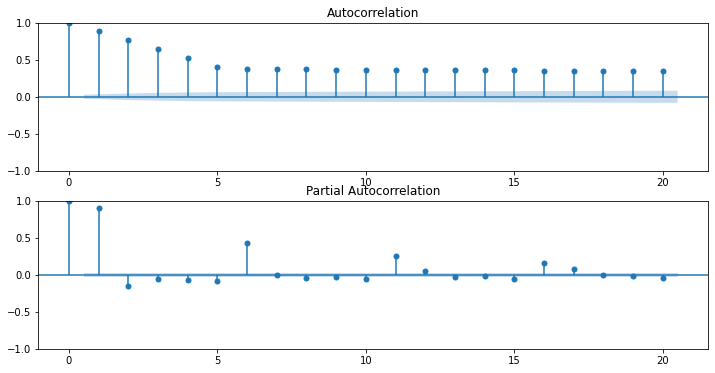

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(ts1['U.S. nuclear capacity'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(ts1['U.S. nuclear capacity'].dropna(), ax=ax[1], lags=20)

Как мы видим, функция ACF убывает, но умеренно, то есть, это не стационарный процесс, кроме
того, значения не лежат в 95% интервале.

У функции PACF чередуется знаки, значения тоже лежат не в 95% интервале, что говорит о том, что это также нестационарный процесс.

То есть, возможно, есть трендовая и сезонная составляющие.

Теперь построим автокорреляцию для ts2:

Text(0.5, 1.0, 'ACF для ts2')

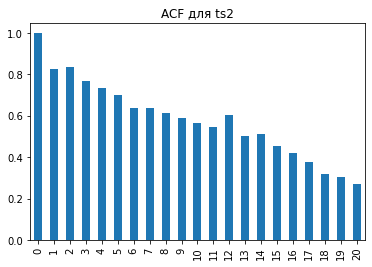

In [21]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts2['Import'].dropna(), nlags=20)
ACF=pd.Series(lag_acf)
ACF.plot(kind = "bar")
plt.title("ACF для ts2")

Text(0.5, 1.0, 'PACF для ts2')

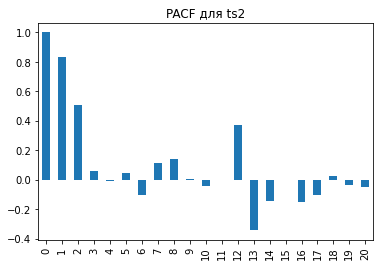

In [22]:
lag_pacf = pacf(ts2['Import'].dropna(), nlags=20)
PACF=pd.Series(lag_pacf)
PACF.plot(kind = "bar")
plt.title('PACF для ts2')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


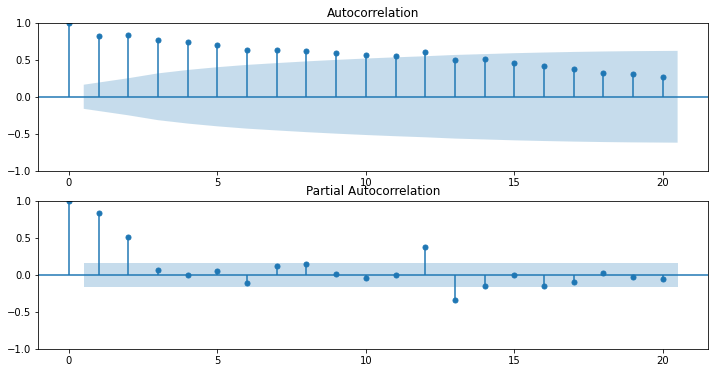

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(ts2['Import'].dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(ts2['Import'].dropna(), ax=ax[1], lags=20)

Как мы видим, функция ACF убывает, но умеренно, то есть, это не стационарный процесс, кроме
того, значения не лежат в 95% интервале.

У функции PACF значения тоже лежат не в 95% интервале, что говорит о том, что это также нестационарный процесс.

In [24]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

Сделаем график для ts1:

<AxesSubplot:>

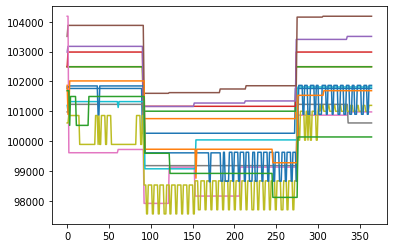

In [25]:
year=0
for i in range (13):
    ts1[year:year+365]['U.S. nuclear capacity'].reset_index(drop=True).plot()
    year+=365
#чтобы избежать структурного сдвига, не будем рисовать год с ним на графике
ts1[365*15:365*16]['U.S. nuclear capacity'].reset_index(drop=True).plot()

Как мы видим, сезонность прослеживается, однако, очень странно.

Сделаем график для ts2:

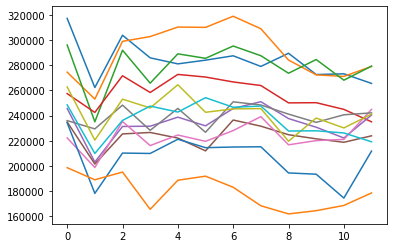

In [26]:
year=0
for i in range (13):
    ts2[year:year+12]['Import'].reset_index(drop=True).plot()
    year+=12

Сезонность тоже как будто прослеживается, однако, тоже, не видно четкой сезонности.

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

Cначала предскажем для 
* $\hat{y}_{t+1} = y_{t}$

In [27]:
#Создадим таблицу для MAE
mae_table = {'model': [], 'MAE': []}
mae_table = pd.DataFrame(data=mae_table)

In [28]:
#ts2
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(ts2_train.Import)
fh = ForecastingHorizon(ts2_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

50757.8275862069

In [29]:
new={'MAE':mae,'model':'Naive_yt'}
mae_table = mae_table.append(new,ignore_index=True)

* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [30]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error

forecaster = NaiveForecaster(strategy="last",sp=12)
forecaster.fit(ts2_train.Import)
fh = ForecastingHorizon(ts2_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

41728.44827586207

In [31]:
new={'MAE':mae,'model':'Naive_yt-seas+1'}
mae_table = mae_table.append(new,ignore_index=True)

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [32]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

SARIMA(1, 1, 1)(1, 0, 0)[12] (ARIMA в sktime)

In [33]:
forecaster = ARIMA(
order=(1, 1, 1),
seasonal_order=(1, 0, 0, 12),
suppress_warnings=True)
forecaster.fit(ts2_train.Import)
fh = ForecastingHorizon(ts2_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

41661.40441046169

In [34]:
new={'MAE':mae,'model':'SARIMA'}
mae_table = mae_table.append(new,ignore_index=True)

Алгоритм Хиндмана-Хандакара подбора SARIMA (AutoARIMA в sktime)

In [35]:
forecaster = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=2, max_d=1, max_q=0, 
                       start_P=1, D=1, start_Q=0, 
                       max_P=1, max_D=1, max_Q=0, 
                       sp=12, suppress_warnings=True, stepwise=False, n_jobs=-1)

forecaster.fit(ts2_train.Import)

AutoARIMA(D=1, max_P=1, max_Q=0, max_d=1, max_p=2, max_q=0, n_jobs=-1, sp=12,
          start_Q=0, start_p=1, start_q=0, stepwise=False,
          suppress_warnings=True)

In [36]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  116
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1132.135
Date:                            Sat, 23 Apr 2022   AIC                           2272.271
Time:                                    18:53:26   BIC                           2282.810
Sample:                                         0   HQIC                          2276.539
                                            - 116                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    349.2424   1270.360      0.275      0.783   -2140.618    2839.103
ar.L1         -0.2024      0.023     -8.900      0.000      -0.247      -0.158
ar.S.L12      -0.1068      0.025     -4.260      0.000      -0.156      -0.058
sigma2      1.776e+08      0.018   9.63e+09      0.000    1.78e+08    1.78e+08
===================================================================================
Ljung-Box (L1) (Q):                  12.83   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               0.63   Skew:                            -0.26
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.78e+29. Standard errors may be unstable.
"""

Как мы видим, лучшая модель SARIMAX(1, 1, 0)x(1, 1, 0, 12)

In [37]:
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

50688.289107533936

In [38]:
new={'MAE':mae,'model':'AutoARIMA'}
mae_table = mae_table.append(new,ignore_index=True)

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [39]:
from orbit.models import LGT
lgt = LGT(
    response_col='Import', 
    date_col='date',
    seasonality=12,
)

# обучаем модель
lgt.fit(df=ts2_train)

# делаем прогноз
predicted_df = lgt.predict(df=ts2_test)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d372bb7bc77e1df83218127fc9dd707d NOW.


In [40]:
mae=mean_absolute_error(ts2_test['Import'],predicted_df.prediction)
mae

44497.14927390303

In [41]:
new={'MAE':mae,'model':'LGT'}
mae_table = mae_table.append(new,ignore_index=True)

In [42]:
from orbit.models import DLT

dlt = DLT(
    response_col='Import', 
    date_col='date',
    seasonality=12,
)

# обучаем модель
dlt.fit(df=ts2_train)

# делаем прогноз
predicted_df = dlt.predict(df=ts2_test)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


In [43]:
mae=mean_absolute_error(ts2_test['Import'],predicted_df.prediction)
mae

44425.721680345996

In [44]:
new={'MAE':mae,'model':'DLT'}
mae_table = mae_table.append(new,ignore_index=True)

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

* ETS(AAA) 

In [45]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)
forecaster.fit(ts2_train.Import)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


39983.954035630464

In [46]:
new={'MAE':mae,'model':'Exp_Smoothing'}
mae_table = mae_table.append(new,ignore_index=True)

* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [47]:
forecaster = AutoETS(trend='add',seasonal='mul',sp=12)
forecaster.fit(ts2_train.Import)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts2_test['Import'],y_pred)
mae

41963.7051125984

In [48]:
new={'MAE':mae,'model':'ETS_AIC'}
mae_table = mae_table.append(new,ignore_index=True)

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [49]:
mae_table

,model,MAE
0,Naive_yt,50757.827586
1,Naive_yt-seas+1,41728.448276
2,SARIMA,41661.404410
3,AutoARIMA,50688.289108
4,LGT,44497.149274
5,DLT,44425.721680
6,Exp_Smoothing,39983.954036
7,ETS_AIC,41963.705113


Как мы видим, лучшая модель -Exponential Smooting (ETS (AAA)). Для данной модели интервальные прогнозы не выдавались.

Построим график.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


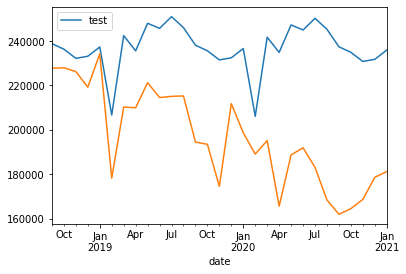

In [50]:
forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)
forecaster.fit(ts2_train.Import)
fh = ForecastingHorizon(ts2_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
y_pred.plot()
plt.legend(['pred'])
ts2_test.Import.plot()
plt.legend(['test'])

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



In [51]:
mae_table = {'model': [], 'MAE': []}
mae_table = pd.DataFrame(data=mae_table)

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

* $\hat{y}_{t+1} = y_{t}$

In [52]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon


forecaster = NaiveForecaster(strategy="last")
forecaster.fit(ts1_train)
fh = ForecastingHorizon(ts1_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts1_test['U.S. nuclear capacity'],y_pred[1])
mae

1611.2457536342781

In [53]:
new={'MAE':mae,'model':'Naive_yt'}
mae_table = mae_table.append(new,ignore_index=True)

* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [54]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error

forecaster = NaiveForecaster(strategy="last",sp=365)
forecaster.fit(ts1_train['U.S. nuclear capacity'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
mae=mean_absolute_error(ts1_test['U.S. nuclear capacity'],y_pred)
mae

1674.3952563121663

In [55]:
new={'MAE':mae,'model':'Naive_yt-seas+1'}
mae_table = mae_table.append(new,ignore_index=True)

### KTR из orbit (1 балл).



In [56]:
from orbit.models import KTR

ktr = KTR(
    response_col='U.S. nuclear capacity', 
    date_col='date',
    seasonality=365
)

# обучаем модель
ktr.fit(df=ts1_train)

# делаем прогноз
predicted_df = ktr.predict(df=ts1_test)
mae=mean_absolute_error(ts1_test['U.S. nuclear capacity'],predicted_df.prediction)
mae

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.
INFO:root:Guessed max_plate_nesting = 1


2155.071199767891

In [57]:
new={'MAE':mae,'model':'KTR'}
mae_table = mae_table.append(new,ignore_index=True)

### Phophet (1 балл).



In [58]:
from prophet import Prophet

train_df_prophet = ts1_train[['date', 'U.S. nuclear capacity']]
train_df_prophet.columns = ['ds', 'y']
model = Prophet(interval_width=0.95
                )
model.fit(train_df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = ts1_test[['date']]
future.columns = ['ds']
forecast = model.predict(future)

In [60]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-09-23,100131.486641,99346.184718,100902.436031
1,2017-09-24,100210.347134,99462.996876,101023.431364
2,2017-09-25,100373.181687,99569.504366,101141.642426
3,2017-09-26,100470.138444,99649.588264,101210.294093
4,2017-09-27,100570.083591,99774.814248,101308.424469


In [61]:
mae=mean_absolute_error(ts1_test['U.S. nuclear capacity'],forecast['yhat'])
mae

2694.5170486403777

In [62]:
new={'MAE':mae,'model':'Prophet'}
mae_table = mae_table.append(new,ignore_index=True)

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [63]:
mae_table

,model,MAE
0,Naive_yt,1611.245754
1,Naive_yt-seas+1,1674.395256
2,KTR,2155.071200
3,Prophet,2694.517049


Лучшая модель-Naive Forecaster (yt). Эта модель также не выдает доверительные интервалы

In [64]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(ts1_train['U.S. nuclear capacity'])
fh = ForecastingHorizon(ts1_test.index, is_relative=False)
y_pred = forecaster.predict(fh)

Cделаем график

<AxesSubplot:xlabel='date'>

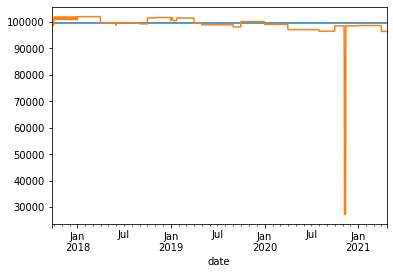

In [65]:
y_pred.plot()
ts1_test['U.S. nuclear capacity'].plot()

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [66]:
#опять создаем таблицу
mae_table = {'model': [], 'MAE': []}
mae_table = pd.DataFrame(data=mae_table)

In [67]:
# Обучим линейную регрессию

In [68]:
#Возьмем ts2

In [70]:
from sklearn.linear_model import LinearRegression
ts2=ts2.reset_index(drop=True)
ts2['t']=ts2.index.to_numpy()
ts2['t^2']=ts2['t']**2
ts2_train=ts2[:int(len(ts2)*0.8)]
ts2_test=ts2[int(len(ts2)*0.8):]
X_train,y_train=ts2_train.t.values.reshape(-1,1),ts2_train.Import
X_test,y_test=ts2_test.t.values.reshape(-1,1),ts2_test.Import
reg = LinearRegression().fit(X_train,y_train)
pred=reg.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mae

18680.17773434238

In [71]:
new={'MAE':mae,'model':'LinReg с t'}
mae_table = mae_table.append(new,ignore_index=True)

In [72]:
#добавим t^2

In [73]:
ts2=ts2.reset_index(drop=True)
ts2['t']=ts2.index.to_numpy()
ts2['t^2']=ts2['t']**2
ts2_train=ts2[:int(len(ts2)*0.8)]
ts2_test=ts2[int(len(ts2)*0.8):]
X_train,y_train=ts2_train[['t','t^2']].values.reshape(-1,2),ts2_train.Import
X_test,y_test=ts2_test[['t','t^2']].values.reshape(-1,2),ts2_test.Import
reg = LinearRegression().fit(X_train,y_train)
pred=reg.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mae

62625.80359560323

In [74]:
new={'MAE':mae,'model':'LinReg c t^2'}
mae_table = mae_table.append(new,ignore_index=True)

In [76]:
#теперь попробуем tree regression

In [75]:
X_train,y_train=ts2_train.t.values.reshape(-1,1),ts2_train.Import
X_test,y_test=ts2_test.t.values.reshape(-1,1),ts2_test.Import
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=456)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mae

50757.8275862069

In [77]:
new={'MAE':mae,'model':'Tree_Regression'}
mae_table = mae_table.append(new,ignore_index=True)

In [78]:
#Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=456)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mae

51191.277586206896

In [ ]:
new={'MAE':mae,'model':'Random Forest'}
mae_table = mae_table.append(new,ignore_index=True)

In [80]:
#попробуем градиентный бустинг

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)
mae=mean_absolute_error(y_test,pred)
mae

50359.89031157296

In [83]:
new={'MAE':mae,'model':'GradientBoostingRegressor'}
mae_table = mae_table.append(new,ignore_index=True)

In [84]:
mae_table

,model,MAE
0,LinReg с t,18680.177734
1,LinReg c t^2,62625.803596
2,Tree_Regression,50757.827586
3,GradientBoostingRegressor,50359.890312


Как мы видим, лучше всего справилась обычная линейная регрессия с t.
Градиентный пустинг, случайный лес, tree regression в одном порядке, но все не очень хорошо.
Также нужно отметить, что все методы для работы со временем справились намного хуже обычной линейной регрессии с t.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [85]:
# ваш код модели на STAN и её обучения здесь

In [86]:
# посчитайте метрики на test

In [87]:
# нарисуйте предсказания